## Introduction
The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new [Marvel Cinematic Universe](https://en.wikipedia.org/wiki/Marvel_Cinematic_Universe).

Because the writers killed off and revived many of the superheroes, the team at FiveThirtyEight was curious to explore data from the [Marvel Wikia site](https://marvel.fandom.com/wiki/Marvel_Database) further. To learn how they collected their data, which is available in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/avengers), read the write-up they published on the [FiveThirtyEight website](https://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/).

### Notes
While the FiveThirtyEight team did a wonderful job acquiring the data, it still has some inconsistencies. Your mission, if you choose to accept it, is to clean up their data set so it can be more useful for analysis in pandas. Let's read it into pandas as a dataframe and preview the first five rows to get a better sense of it.

In [31]:
import pandas as pd

avengers = pd.read_csv(r"E:\vinod\profession\learn\datascience\dataquest\cleaningdata\avengers.csv", encoding="latin")
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


### Notes
Because the data came from a crowdsourced community site, it could contain errors. If you plot a histogram of the values in the `Year` column, which describes the year Marvel introduced each Avenger, you'll immediately notice some oddities. For example, there are quite a few Avengers who look like they were introduced in 1900, which we know is a little fishy -- the Avengers weren't introduced in the comic series until the 1960's!

This is obviously a mistake in the data. As a result, you should remove all of the Avengers introduced before 1960 from the dataframe.

### Instructions
- We only want to keep the Avengers who were introduced after 1960.
    - Store only the rows describing Avengers added in 1960 or later in `true_avengers`.

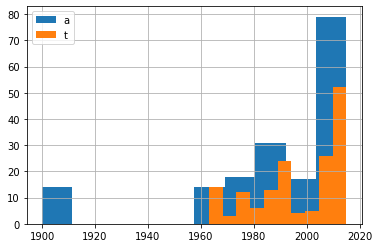

In [32]:
import matplotlib.pyplot as plt
true_avengers = pd.DataFrame()

avengers['Year'].hist()
true_avengers = avengers[avengers['Year'] >= 1960]
true_avengers['Year'].hist().legend('at')

### Notes
We're interested in the total number of deaths each character experienced, so we'd like to have a single field containing that information. Right now, there are five fields (`Death1` to `Death5`), each of which contains a binary value representing whether a superhero experienced that death or not. For example, a superhero could experience `Death1`, then `Death2`, and so on until the writers decided not to bring the character back to life.

We'd like to combine that information in a single field so we can perform numerical analysis on it more easily.

### Instructions:
- Create a new column, `Deaths`, that contains the number of times each superhero died. The possible values for each death field are `YES`, `NO`, and `NaN` for missing data.
    - Keep all of the original columns (including `Death1` to `Death5`) and update `true_avengers` with the new `Deaths` column.


In [35]:
def avng_deaths(row):
    death_count = 0
    deathcol = ['Death1','Death2','Death3','Death4','Death5']
    
    for d in deathcol:
        death = row[d]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            death_count +=1
    return death_count


true_avengers['Deaths']=true_avengers.apply(avng_deaths, axis=1)

C:\Users\vino\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
true_avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269.0,YES,MALE,NaN,Sep-63,1963.0,52.0,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165.0,YES,FEMALE,NaN,Sep-63,1963.0,52.0,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068.0,YES,MALE,NaN,Sep-63,1963.0,52.0,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089.0,YES,MALE,NaN,Sep-63,1963.0,52.0,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402.0,YES,MALE,NaN,Sep-63,1963.0,52.0,Full,...,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2


### Notes
For our final task, we want to verify that the `Years since joining` field accurately reflects the `Year` column. For example, if an Avenger was introduced in the `Year` 1960, is the `Years since joining` value for that Avenger 55?

### Instructions
- Calculate the number of rows where `Years since joining` is accurate.
    - Because this challenge was created in 2015, use that as the reference year.
    - We want to know for how many rows `Years since joining` was correctly calculated as the `Year` value subtracted from 2015.
    - Assign the integer value describing the number of rows with a correct value for `Years since joining` to `joined_accuracy_count`.

In [44]:
joined_accuracy_count  = int()
joined_accuracy_count = len(true_avengers[true_avengers['Years since joining'] == 2015 - true_avengers['Year']])

#### Conclusion
In this project we have tried to clean avengers dataset

1) We have clean avengers which were introduced in 1900, as avengers where forst introduced in 1960

2) We have calculated number of death count for each avenger

3) We have calculated the accurate number of years avenger has joined